#### Practise ML: KNN, DecisionTreeClassifier
##### Date: 2026-01-05

**Materials**:
> 1. [KNN](https://itwiki.dev/data-science/ml-reference/ml-glossary/knn-models) 
> 2. [DTC](https://www.geeksforgeeks.org/machine-learning/decision-tree/)

In [ ]:
# Task: зробити модуль для визначення хвороби у пацієнта 

# Кроки для ML
# Крок 1. Do EDA + візуалізація (опціонально)
# Крок 2. Clear Data 
# Крок 3. Scale data 
# Крок 4. Split data to train/test
# Крок 5. KNN + hyperparametr
# Крок 6. DecisionTreeClassifier + hyperparametr

In [ ]:
# !!!! Треба встановити sklearn !!!!

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer(as_frame=True)

X = data.data        
y = data.target      

X.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [5]:
y.unique()

array([0, 1])

---
#### Крок 1. EDA

In [3]:
X.shape

(569, 30)

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
X.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [8]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


---
#### Крок 2. Clear Data

In [21]:
X = X.fillna(X.median(numeric_only=True))
X.shape

(569, 30)

In [22]:
X= X.drop_duplicates()
X.shape

(569, 30)

In [24]:
import pandas as pd

X = pd.DataFrame(
    X,
    columns=data.feature_names
)
corr_matrix = X.corr()

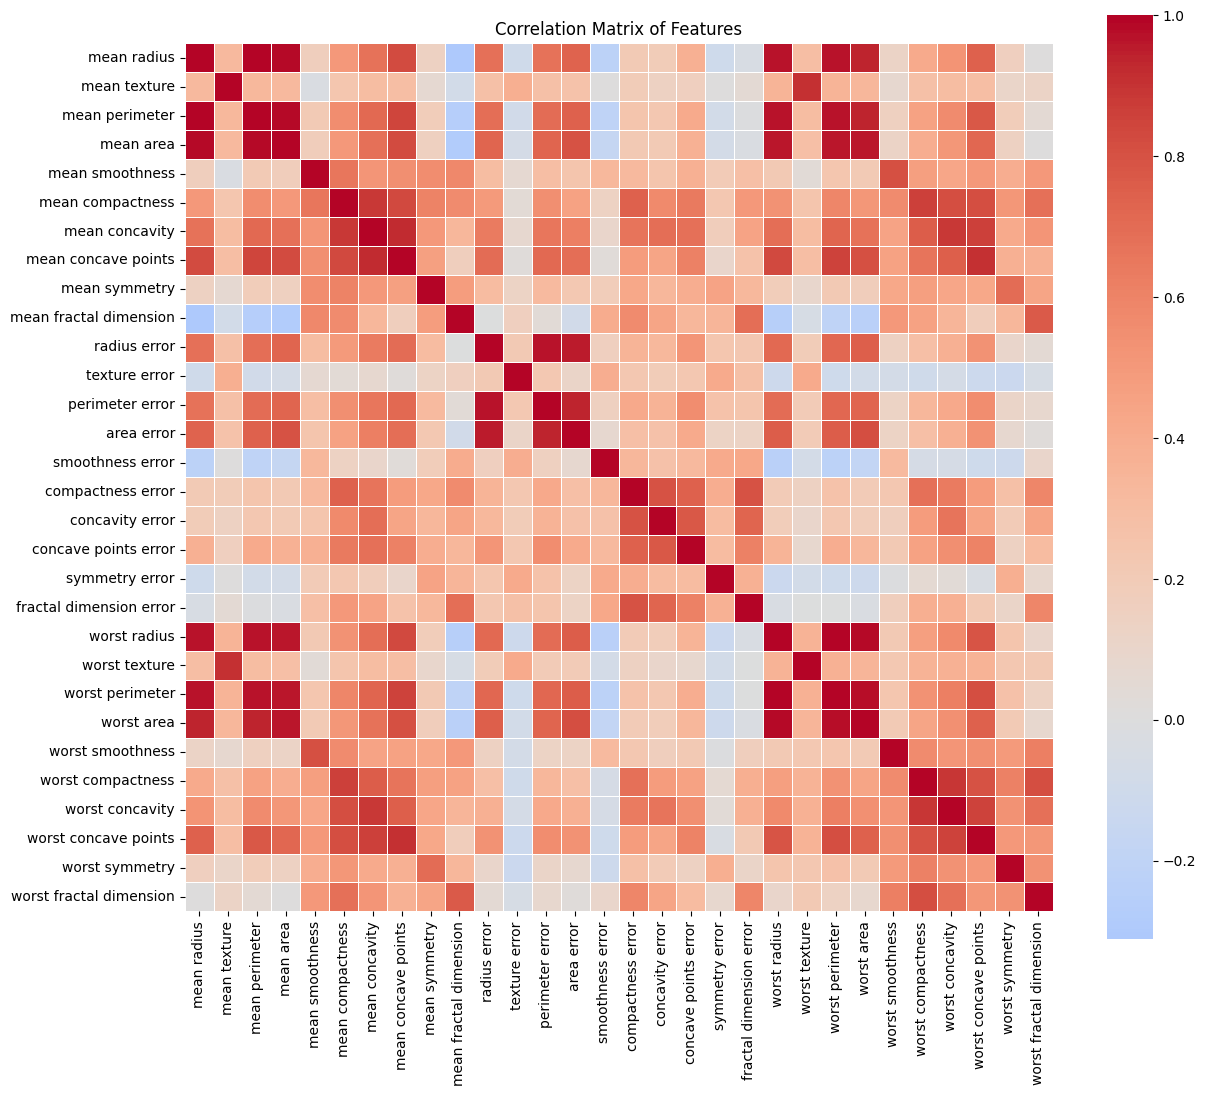

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5
)
plt.title("Correlation Matrix of Features")
plt.show()

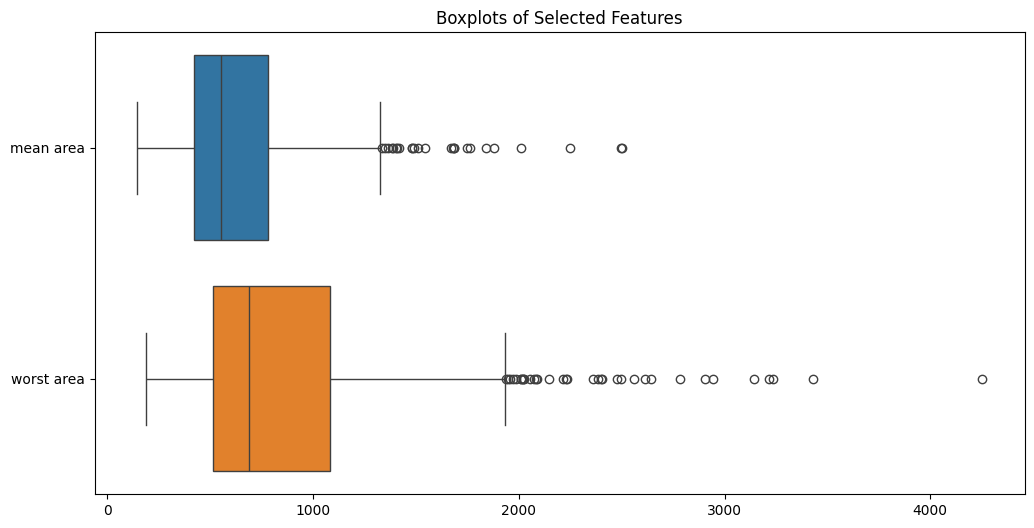

In [35]:
cols = [
    "mean area",
    "worst area"
]

plt.figure(figsize=(12, 6))
sns.boxplot(data=X_df[cols], orient="h")
plt.title("Boxplots of Selected Features")
plt.show()

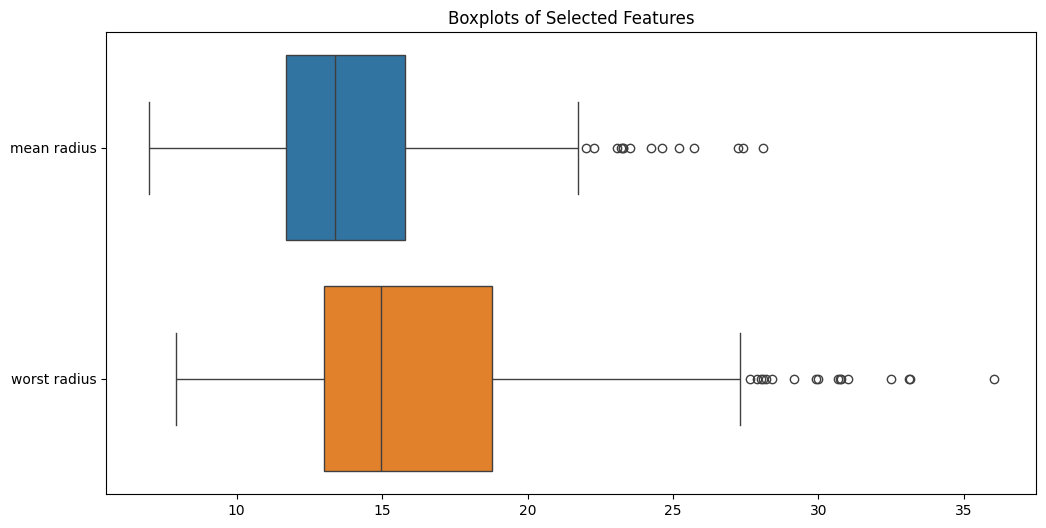

In [36]:
cols = [
    "mean radius",
    "worst radius"
]

plt.figure(figsize=(12, 6))
sns.boxplot(data=X_df[cols], orient="h")
plt.title("Boxplots of Selected Features")
plt.show()

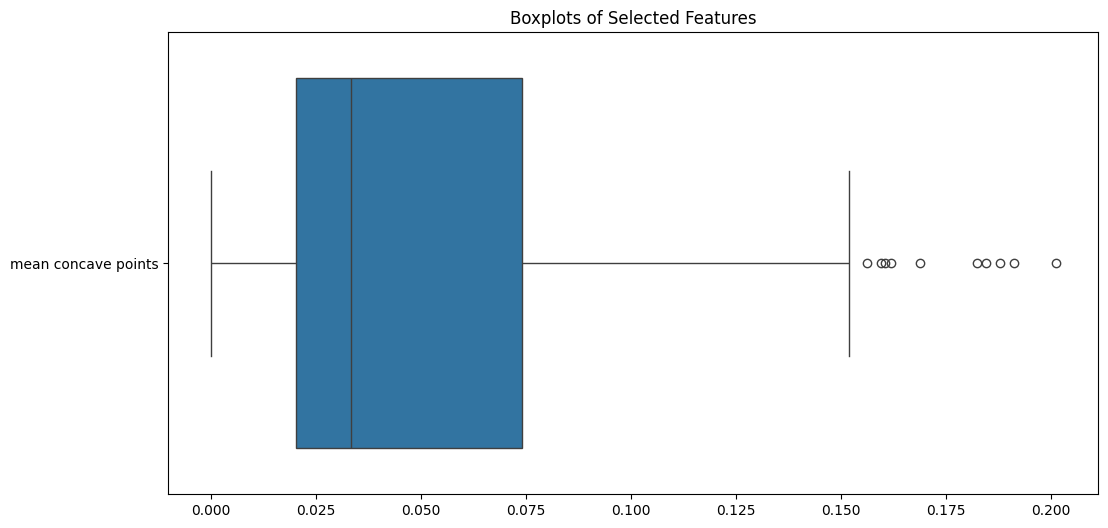

In [37]:
cols = [
   "mean concave points",
]

plt.figure(figsize=(12, 6))
sns.boxplot(data=X_df[cols], orient="h")
plt.title("Boxplots of Selected Features")
plt.show()

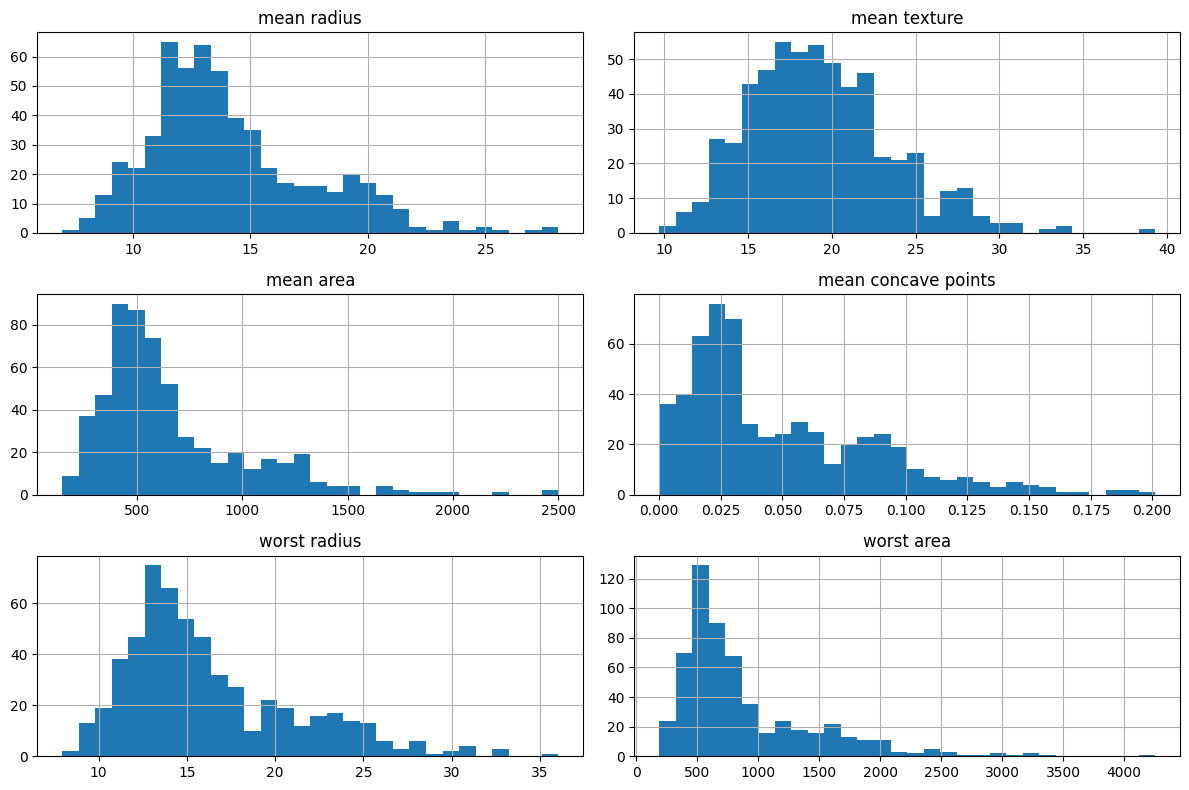

In [38]:
import matplotlib.pyplot as plt

cols = [
    "mean radius",
    "mean texture",
    "mean area",
    "mean concave points",
    "worst radius",
    "worst area"
]

X[cols].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

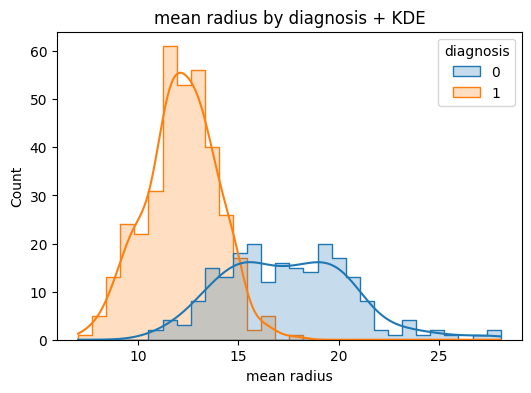

In [39]:
df_full = X.copy()
df_full["diagnosis"] = y
col = "mean radius"
plt.figure(figsize=(6,4))
sns.histplot(data=df_full, x=col, hue="diagnosis", bins=30, kde=True, element="step")
plt.title(f"{col} by diagnosis + KDE")
plt.show()

---
Крок 3. Scale data 

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# use .fit_transorm
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


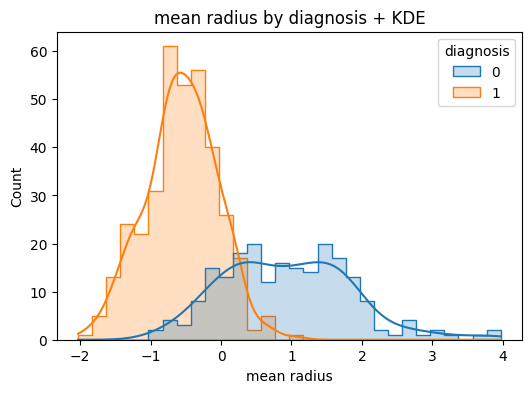

In [42]:
df_full = X_scaled.copy()
df_full["diagnosis"] = y
col = "mean radius"
plt.figure(figsize=(6,4))
sns.histplot(data=df_full, x=col, hue="diagnosis", bins=30, kde=True, element="step")
plt.title(f"{col} by diagnosis + KDE")
plt.show()

---
#### Крок 4. Split data

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.20, random_state=42
)


---
#### Крок 5. KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


knn = KNeighborsClassifier(n_neighbors=13)  # найчастіше стартують з 5
knn.fit(X_train, y_train)   

y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9736842105263158

In [64]:
scores = []
n_values = range(1, 21, 2)
for k in n_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    scores.append(acc)
    print(f"k={k:2d}. accuracy={acc:.3f}")


k= 1. accuracy=0.930
k= 3. accuracy=0.930
k= 5. accuracy=0.956
k= 7. accuracy=0.956
k= 9. accuracy=0.956
k=11. accuracy=0.982
k=13. accuracy=0.974
k=15. accuracy=0.965
k=17. accuracy=0.965
k=19. accuracy=0.965


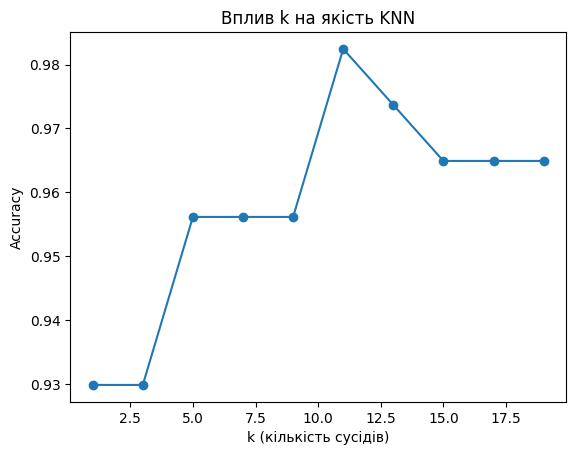

In [68]:
plt.plot(n_values, scores, marker="o")
plt.xlabel("k (кількість сусідів)")
plt.ylabel("Accuracy")
plt.title("Вплив k на якість KNN")
plt.show()

---
Крок 6. DecisionTreeClassifier

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Створюємо модель дерева рішень
tree = DecisionTreeClassifier(random_state=42)

# Навчаємо модель:
# X_train — ознаки навчальної вибірки
# y_train — правильні відповіді (класи) для навчальної вибірки
tree.fit(X_train, y_train)

# Робимо прогноз для тестової вибірки (X_test) і рахуємо точність (accuracy)
y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9473684210526315


In [89]:
tree.feature_importances_

array([0.        , 0.05847766, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.69141955, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01198257, 0.00123678,
       0.        , 0.00627578, 0.01593081, 0.        , 0.01855447,
       0.05229927, 0.01744516, 0.05149396, 0.        , 0.00923319,
       0.        , 0.        , 0.06565079, 0.        , 0.        ])

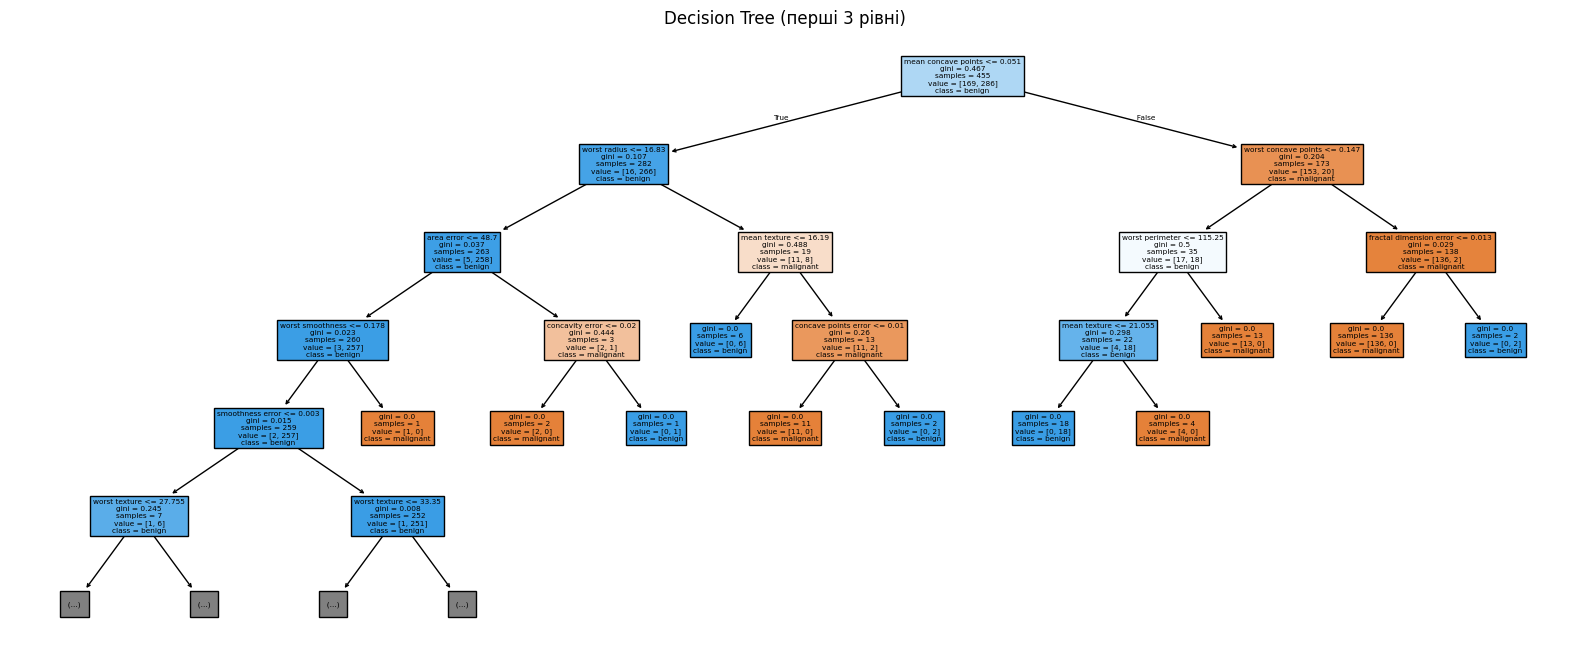

In [92]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 8))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=data.target_names,
    filled=True,
    max_depth=5
)
plt.title("Decision Tree (перші 3 рівні)")
plt.show()


In [91]:
# Fine-tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [2, 3, 4, 5, 6],
    "min_samples_leaf": [1, 5, 10, 20]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_, grid.best_estimator_


({'max_depth': 3, 'min_samples_leaf': 5},
 np.float64(0.9340659340659341),
 DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42))

In [90]:
# Fine-tuning
from sklearn.model_selection import GridSearchCV

# knn = KNeighborsClassifier(n_neighbors=k)
param_grid = {
    "n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_, grid.best_estimator_

({'n_neighbors': 9},
 np.float64(0.9274725274725274),
 KNeighborsClassifier(n_neighbors=9))

In [73]:
# Зберегти модель
import joblib

joblib.dump(knn, "knn_model.pkl")
joblib.dump(tree, "tree_model.pkl")


['tree_model.pkl']